#### Vectors and matrices in Python

In [49]:
#Matrices and Vectors 
from numpy import array

In [50]:
print("This is vector representation of ket in aray")

ket0 = array([1, 0])
ket1 = array([0, 1])

display(ket0 / 2 + ket1 / 2)

This is vector representation of ket in aray


array([0.5, 0.5])

In [51]:
M1 = array([[1,1], [0,0]])
M2 = array([[1,1], [1,0]])

M1 / 2 + M2 / 2

array([[1. , 1. ],
       [0.5, 0. ]])

In [52]:
from numpy import matmul 

print(f"{M1} * {ket1} = {matmul(M1, ket1)}")

display(matmul(M1, ket1))
display(matmul(M1, M2))
display(matmul(M2, M1))

[[1 1]
 [0 0]] * [0 1] = [1 0]


array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

#### Defining and displaying state vectors

In [53]:
#Defining and displaying state vectors
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1+2.0j)/3, -2/3])
w = Statevector([1/3, 2/3])

print("State vectors u, v, w have been defined.")

State vectors u, v, w have been defined.


In [54]:
display(u.draw('latex'))
display(v.draw('latex'))
display(w.draw('latex'))

print("For comparisson this is the text representation:")
display(u.draw('text'))
display(v.draw('text'))
display(w.draw('text'))



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

For comparisson this is the text representation:


[0.70710678+0.j,0.70710678+0.j]

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

[0.33333333+0.j,0.66666667+0.j]

In [55]:
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

#### Simulating measurements using `Statevector`

In [56]:
v = Statevector([(1 + 2.0j)/3, -2/3])
v.draw('latex')

<IPython.core.display.Latex object>

In [57]:
u.measure()

('0',
 Statevector([1.+0.j, 0.+0.j],
             dims=(2,)))

In [58]:
v.measure()

('1',
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

Since `w` is not a valid  statevector, we cannot measure it using `w.measure()` 

{'0': 574, '1': 426}

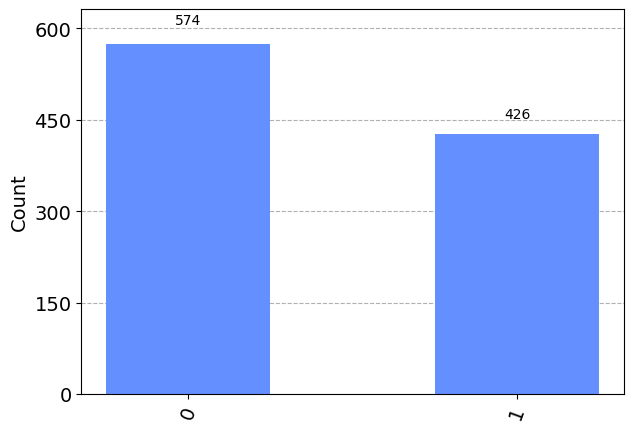

In [ ]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(shots=1000)
display(statistics)
plot_histogram(statistics)

#### Performing operations with `Operator` and `Statevector`

In [ ]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1/sqrt(2), 1/sqrt(2)], [1/sqrt(2), -1/sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1+1.0j)/sqrt(2)]])

v = Statevector([1,0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

#v.draw('text')
v.draw('latex')

<IPython.core.display.Latex object>

#### Looking ahead toward quantum circuit

In [64]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [65]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

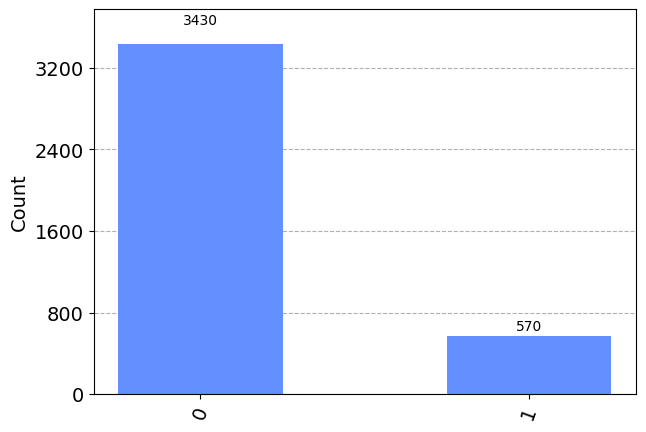

In [66]:
statistic = v.sample_counts(4000)
plot_histogram(statistic)